## Auther
Name : Bhagyesh Vikani <br/>
Email : bhagyeshvikani@gmail.com

## Dataset

Name : All India Consumer Price Index (Jan, 2013 - Aug, 2016) <br />
Source : data.gov.in <br />
Format : CSV <br />
Download Link : https://data.gov.in/resources/all-india-consumer-price-index-ruralurban-august-2016/download <br />
Note : Downloaded csv need manual data cleaning

In [1]:
# Imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Read original data

data = pd.read_csv("All_India_Index_August2016.csv")
data = data.fillna(method = "backfill")
data = data.fillna(method = "ffill")

# Read converted data according to time money value
converted_data = pd.read_csv("Converted.csv")

In [3]:
# List of all different CPI

cpi_index = data.columns.values.tolist()
cpi_index.remove("Sector")
cpi_index.remove("Year")
cpi_index.remove("Month")

In [4]:
# # To convert original data into time money value data

# today = data.copy()
# no = len(today) // 3

# for col in cpi_index:
#     for i in range(0, no):
#         today[col].ix[3 * i] = data[col].ix[3 * i] * ((1 + 0.065) ** ((no - i - 1) / 12.0))
#         today[col].ix[3 * i + 1] = data[col].ix[3 * i + 1] * ((1 + 0.065) ** ((no - i - 1) / 12.0))
#         today[col].ix[3 * i + 2] = data[col].ix[3 * i + 2] * ((1 + 0.065) ** ((no - i - 1) / 12.0))

# today.to_csv("Converted.csv", index = False)

In [5]:
# Make data catagorical

data["Sector"] = pd.Categorical(data["Sector"], ["Rural", "Urban", "Rural+Urban"])
data["Year"] = pd.Categorical(data["Year"], [2013, 2014, 2015, 2016])
data["Month"] = pd.Categorical(data["Month"], ["January", "February", "March", "April", "May", "June", "July", 
                                               "August", "September", "October", "November", "December"])

converted_data["Sector"] = pd.Categorical(converted_data["Sector"], ["Rural", "Urban", "Rural+Urban"])
converted_data["Year"] = pd.Categorical(converted_data["Year"], [2013, 2014, 2015, 2016])
converted_data["Month"] = pd.Categorical(converted_data["Month"], ["January", "February", "March", "April", "May", "June", "July", 
                                               "August", "September", "October", "November", "December"])

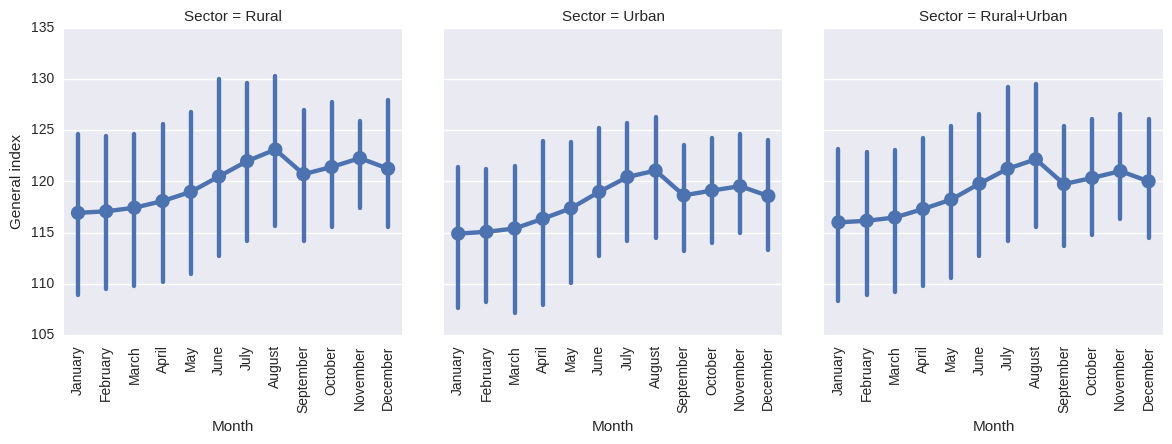

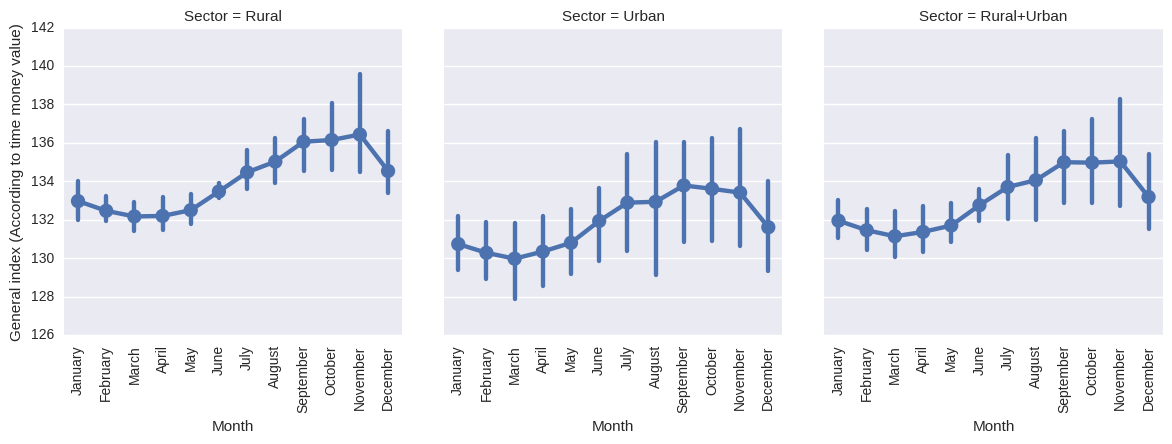

In [6]:
g1 = sns.factorplot(x = "Month", y = "General index", col = "Sector", data = data)
g1.set_xticklabels(rotation = 90)

g2 = sns.factorplot(x = "Month", y = "General index", col = "Sector", data = converted_data)
g2.set_xticklabels(rotation = 90)

g2.set_ylabels("General index (According to time money value)")

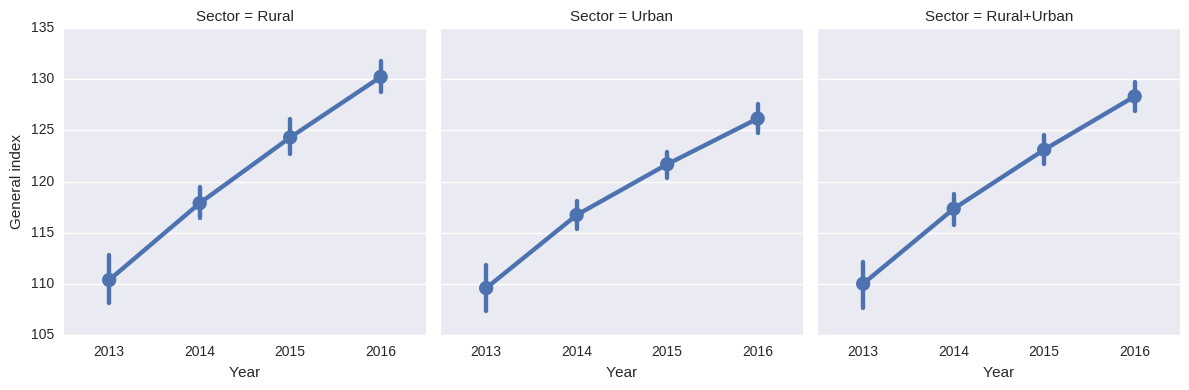

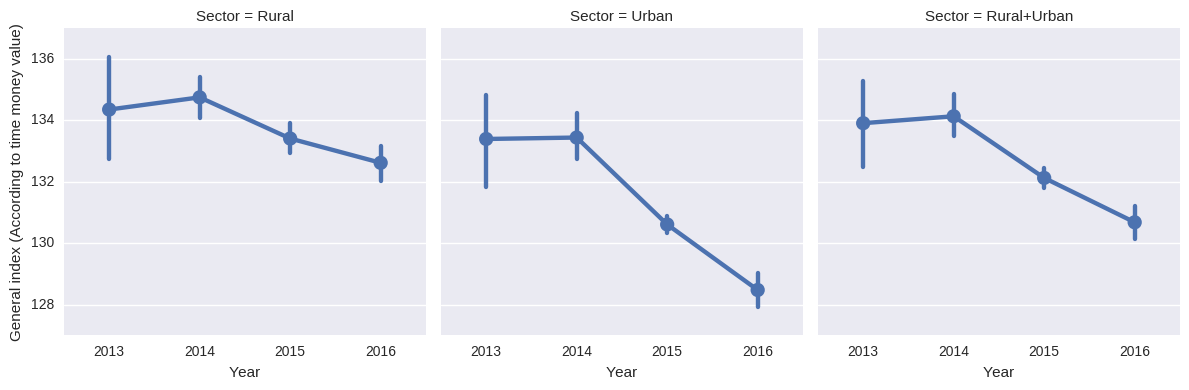

In [7]:
g1 = sns.factorplot(x = "Year", y = "General index", col = "Sector", data = data)

g2 = sns.factorplot(x = "Year", y = "General index", col = "Sector", data = converted_data)
g2.set_ylabels("General index (According to time money value)")

In [8]:
# Groupby ["Month", "Year"]

cpi = data.groupby(["Month", "Year"], as_index = False).mean()
converted_cpi = converted_data.groupby(["Month", "Year"], as_index = False).mean()

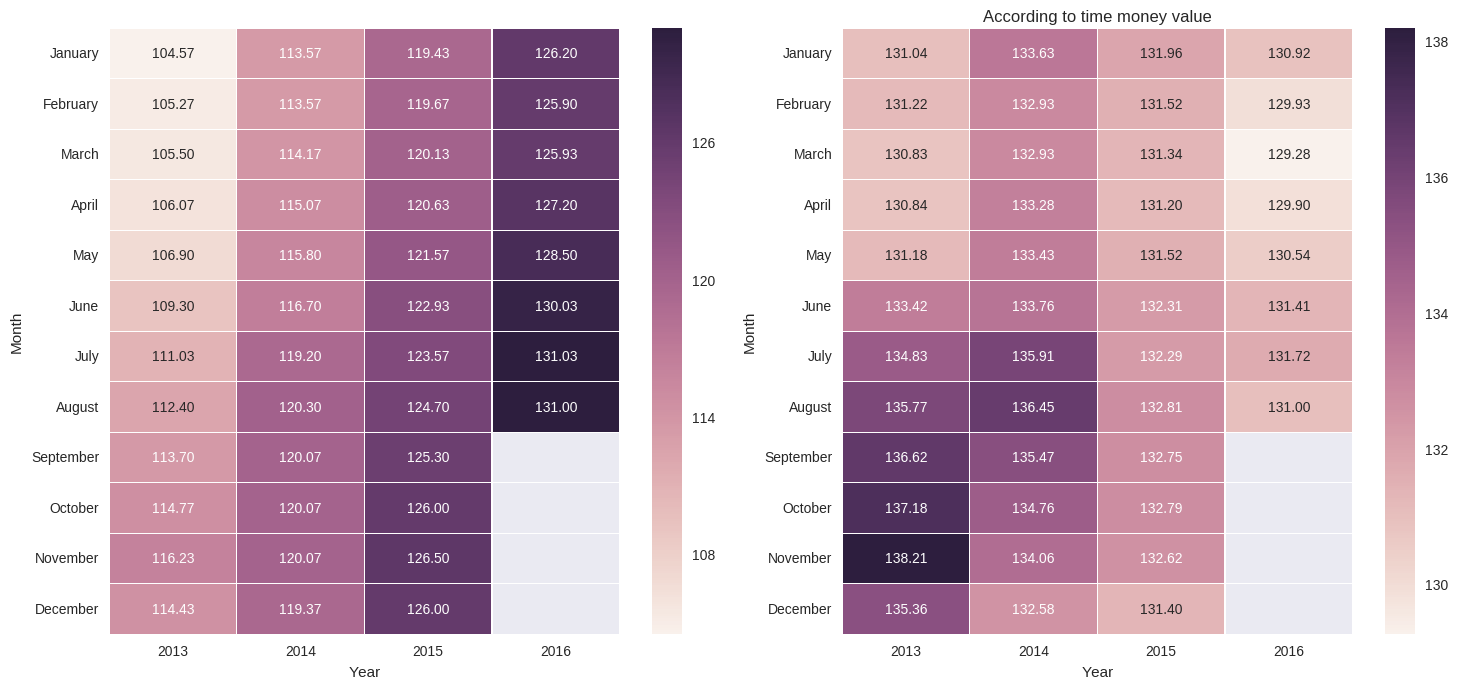

In [9]:
# "General index" respect to change in Month and Year

cpi_general = cpi.pivot("Month", "Year", "General index")
converted_cpi_general = converted_cpi.pivot("Month", "Year", "General index")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7))
ax2.set_title("According to time money value")

sns.heatmap(cpi_general, annot = True, fmt = "0.2f", linewidths = .25, ax = ax1)
sns.heatmap(converted_cpi_general, annot = True, fmt = "0.2f", linewidths = .25, ax = ax2)

fig.tight_layout()